<a href="https://colab.research.google.com/github/StayHomeThereIsNoFrance/AnchorHODL/blob/main/Terrarbitrage_UST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Notebook structure

The notebook is divided into several sections, which should allow for a better reading experience.

* **Context**: this section provides an introduction to the protocols, technology and objective involved in this analysis
* **Data**: briefly presents how the data has been obtained and its structure
* **Key findings**: lists the main discoveries obtained from this analysis
* **Analysis**: the actual process that led to the key findings. This section is divded in subsections for the each different aspects analysed and questions answered.
* **Appendix**: this section contains data preparation and cleaning steps. They are required to be executed before the analysis section, but for better readability we have moved them to the end of the notebook.

## Context


### Section1

### Section2


## Objective


## Data

In this section we will describe how the data has been queried and its structure.

### Query

### Structure


## Key Findings

# Analysis


In [ ]:
#@title
#code

In [ ]:
cols_dict = {
    'year_month_day':'Date',
    'tx_id':'Nunmber of transactions',
    'profit':'Profit'
}

<AxesSubplot:xlabel='year_month_day'>

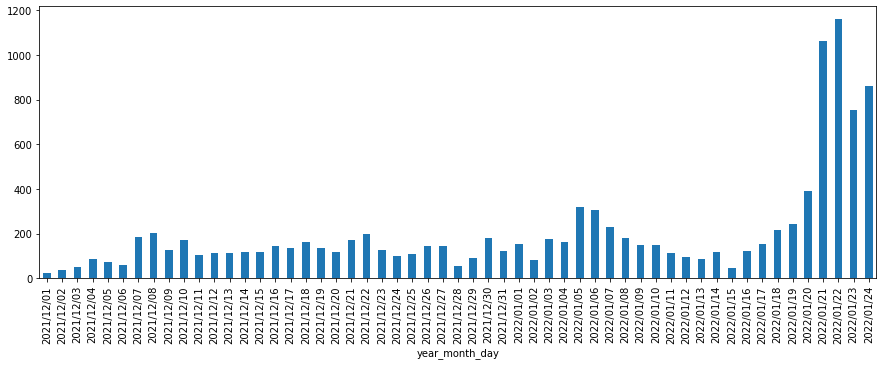

In [ ]:
df = arb_txs.groupby('year_month_day').tx_id.nunique()
df.reset_index().rename(columns=cols_dict).to_csv('./n_tx_over_time.csv')
df.plot(kind='bar')

In [ ]:
a = arb_txs.groupby('tx_id').agg(max_index=('msg_index', 'max'), min_index=('msg_index', 'min'))
last = arb_txs.merge(a, on='tx_id')
last = last[last.max_index==last.msg_index]

first = arb_txs.merge(a, on='tx_id')
first = first[first.min_index==first.msg_index]

arb = first.merge(last, on='tx_id', suffixes=['_first','_last'])
arb = arb[arb.offer_asset_first==arb.ask_asset_last]
arb['profit'] = (arb.return_amount_last-arb.offer_amount_first)/1000000
arb[['tx_id','offer_asset_first','offer_amount_first','ask_asset_last','return_amount_last','profit']]


,tx_id,offer_asset_first,offer_amount_first,ask_asset_last,return_amount_last,profit
0,7B2F367AE82B35C2935BBF778D89D0F7906E3C97C88602EAAE0587E00CE7039E,uusd,100000000.0,uusd,98684608.0,-1.315392
1,A3C732E700945CD1B727C5E8B1D88A3394881CE842163A3DF3943CB699E6AF9E,uusd,100000000.0,uusd,99385538.0,-0.614462
2,4370DA0ECF447E794B7DEE0F3C096BA25B102669645ED0100909B7C20E4ADFD6,uusd,100000000.0,uusd,101202172.0,1.202172
3,7142BAC828AEF7F55A2EA9725BD8819B4BD226D9C8E1FF684D3CE3E687749642,uusd,100000000.0,uusd,101037204.0,1.037204
4,E5325078ACB840A8402B64F9509BE61CE73F8BE70CBC6CBF30E01DB81657CB17,uusd,100000000.0,uusd,100733034.0,0.733034
...,...,...,...,...,...,...
11033,05D25CB676F24EFD74DBE0BC48F372C1F135020D617A8748ED99E7AC3FD862D8,uusd,75103217.0,uusd,75691238.0,0.588021
11034,F8BFB52EAD07DC2E3E1BAB7044FC867594172D6505206054C91D701655832EE7,uusd,96560391.0,uusd,97294378.0,0.733987
11035,BC8146D3EC2AAB25081D6B95B573700B8864F907315EB156A781DE300059964E,uusd,199378876.0,uusd,200677501.0,1.298625
11036,50C174F4A396E6B751E89495C8CE47B769EB1ED7BD6B65C83A76E84BBCED0792,uusd,45367677.0,uusd,45755133.0,0.387456


### Profit

In [ ]:
arb['profit'] = (arb.return_amount_last-arb.offer_amount_first)/1000000
arb.profit.describe()

count    10906.000000
mean         4.403236
std         50.162439
min       -296.750454
25%          0.292829
50%          0.592881
75%          0.981567
max       2623.557616
Name: profit, dtype: float64

**Cumulative profit**

<AxesSubplot:xlabel='year_month_day'>

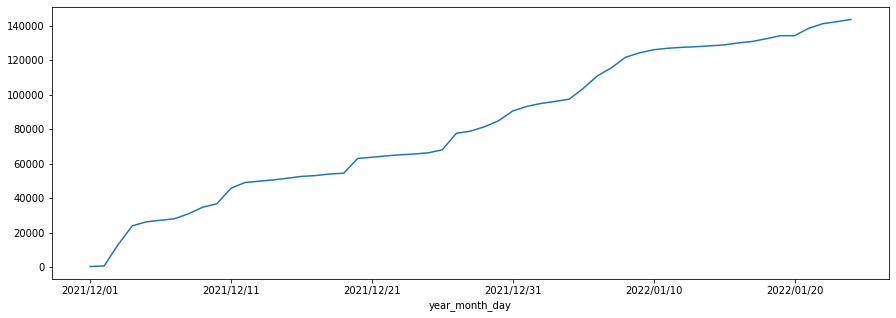

In [ ]:
df = arb_txs[['tx_id','year_month_day']].merge(arb[['tx_id','profit']],on='tx_id')\
            .groupby('year_month_day').profit.sum()\
            .sort_index().cumsum()
df.reset_index().rename(columns=cols_dict).to_csv('./cum_profit_time.csv')
df.plot(kind='line')

<AxesSubplot:xlabel='profit', ylabel='Density'>

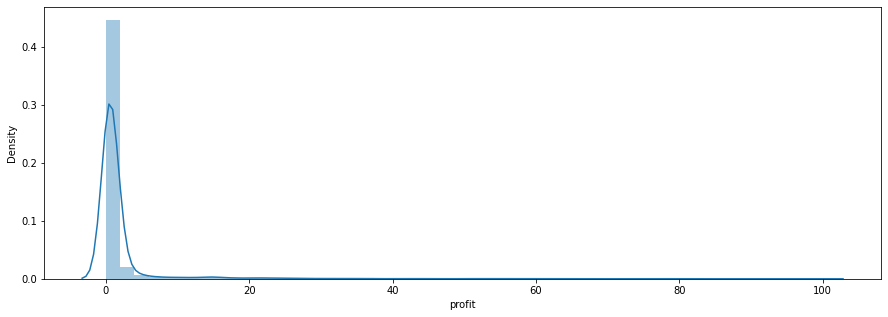

In [ ]:
sns.distplot(arb[(arb.profit<100)&(arb.profit>0)].profit)

**Assets**

In [ ]:
arb.offer_asset_first.value_counts()

uusd    10906
Name: offer_asset_first, dtype: int64

**Senders**

In [ ]:
def shorten_sender(sender):
    return f"{sender[0:10]}...{sender[-5:]}"

In [ ]:
arb['sender_first_short'] = arb.sender_first.apply(shorten_sender)
df = arb.sender_first_short.value_counts().head(20)
df.index = df.index.rename('Address')
df[df.index!='...'].to_csv('./top_addresses.csv')
df.head()

Address
terra1ek8l...hx3fe    5233
terra1sda0...fmsky    2076
terra1zg8p...m5p54    1063
terra1csae...0dtqv     794
terra1stmh...6mm4y     640
Name: sender_first_short, dtype: int64

**How many hops?**

<AxesSubplot:xlabel='Number of hops'>

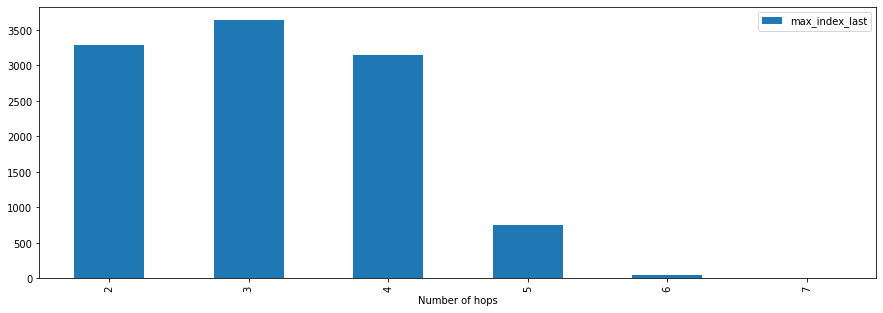

In [ ]:
df = arb.max_index_last.value_counts().reset_index()
df['index'] = df['index']+1
df=df.set_index('index')
df = df.sort_index()
df.index = df.index.rename('Number of hops')
df.to_csv('./hops.csv')
df.plot(kind='bar')

**Longest tx by hops?**

In [ ]:
arb[arb.max_index_last==4][['tx_id','profit']]

,tx_id,profit
40,67A82E863536AF60DB506194FFFEB134FDB0CDBC2898E648AC46813835CD16CA,18.564908
44,DDCF631D387B99286DEDB1C44CA8F25D877574C83BC9FE049356F42165714EEE,36.082538
97,7BE853D7A176CF7B928D7763C120B3ECAA41207C5F399450A75AE53FF44182D8,26.574966
112,10DE675300777F4B1F22F0D7FE9B6995EF34F8B5ED8801CA0ED758693D5DE792,14.130306
113,A9C3E10AFCBE673D898276B13BA05F9B05DFA41FB50D71EEBC65AA6E0C492CB7,101.640082
...,...,...
10730,2A4807AFFFBD2B480C4E371CAB4B0AE76766D04C8A059F1321AACA0DF702B311,-19.087682
10733,7F3594F610D649638E55C8BD1B0EA6BF43147A33CA574702F98AD241084D5D32,-1.324316
10825,30CE21D103495C4CAC3BC25CC059DCDCBABC366B292EE1A3AF0FAF1719C2665D,14.291691
10827,AEE03B31162651D4ABBAAC3D7CBEB68D910606C1DA24E8F6D2B4828A33F559C8,7.763404


**Most used pool**

<AxesSubplot:xlabel='Liquidity pool'>

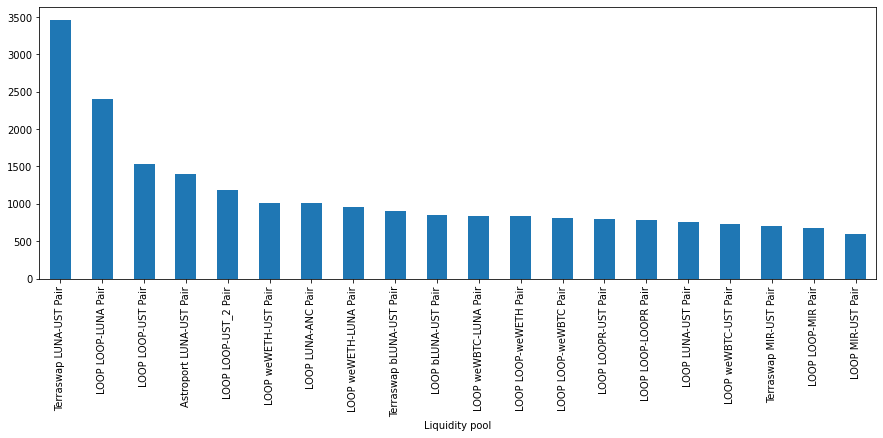

In [ ]:
df = arb_txs[arb_txs.tx_id.isin(arb_txs.tx_id)].pool_name.value_counts().head(20)
df.index = df.index.rename('Liquidity pool')
df.to_csv('./top_pools.csv')
df.plot(kind='bar')

**-----**

### Networks

In [ ]:
import networkx as nx

In [ ]:
ntwrk = arb_txs.merge(arb_txs, on='tx_id', suffixes=['_pre','_post'])
ntwrk = ntwrk[ntwrk.msg_index_pre+1==ntwrk.msg_index_post]
ntwrk=ntwrk[['tx_id','pool_name_pre','pool_name_post']]
ntwrk=ntwrk.groupby(['pool_name_pre','pool_name_post']).tx_id.count().reset_index()
ntwrk.to_csv('./ust_arb_ntwrk.csv')

In [ ]:
G = nx.Graph()
G.add_nodes_from(arb_txs.pool_name.values)
G.add_edges_from(ntwrk[['pool_name_pre','pool_name_post']].to_records(index=False))


**Connected components**

In [ ]:
print(nx.info(G))

Graph with 117 nodes and 285 edges


In [ ]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.041998231653404064


In [ ]:
components = nx.connected_components(G)
largest_component = max(components, key=len)

In [ ]:
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

Network diameter of largest component: 14


In [ ]:
conn_components = sorted(nx.connected_components(G), key = len, reverse=True)
len(conn_components)

15

In [ ]:
[len(c) for c in conn_components]

[88, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [ ]:
components_id = dict(zip(range(14),conn_components))

In [ ]:
components_id

{0: {'Astroport LUNA-UST Pair',
  'Astroport bLUNA-LUNA Pair',
  'LOOP ALTE-UST Pair',
  'LOOP ANC-UST Pair',
  'LOOP LOOP-LOOPR Pair',
  'LOOP LOOP-LOTA Pair',
  'LOOP LOOP-LUNA Pair',
  'LOOP LOOP-MINE Pair',
  'LOOP LOOP-MIR Pair',
  'LOOP LOOP-UST Pair',
  'LOOP LOOP-UST_2 Pair',
  'LOOP LOOP-weWBTC Pair',
  'LOOP LOOP-weWETH Pair',
  'LOOP LOOPR-UST Pair',
  'LOOP LOTA-UST Pair',
  'LOOP LUNA-ANC Pair',
  'LOOP LUNA-UST Pair',
  'LOOP MINE-UST Pair',
  'LOOP MIR-UST Pair',
  'LOOP SPEC-UST Pair',
  'LOOP STT-UST Pair',
  'LOOP bLUNA-LUNA Pair',
  'LOOP bLUNA-UST Pair',
  'LOOP weWBTC-LUNA Pair',
  'LOOP weWBTC-UST Pair',
  'LOOP weWETH-LUNA Pair',
  'LOOP weWETH-UST Pair',
  'Loop HALO-UST Pair',
  'Nexus Nexus Vault bETH',
  'Nexus Nexus Vault bLuna',
  'Terraswap ALTE-UST Pair',
  'Terraswap ANC-UST Pair',
  'Terraswap LOTA-UST Pair',
  'Terraswap LUNA-KRT Pair',
  'Terraswap LUNA-MNT Pair',
  'Terraswap LUNA-SDT Pair',
  'Terraswap LUNA-UST Pair',
  'Terraswap MIAW-UST Pair',
 

In [ ]:
contr_id = {}
for i, contrs in components_id.items():
    for contr in contrs:
        contr_id[contr] = i

In [ ]:
arb_txs['component_id']=arb_txs.pool_name.map(contr_id)

In [ ]:
points = arb_txs.groupby(['pool_name','protocol','component_id']).tx_id.count().reset_index()
df=points[points.component_id==points.component_id.min()]\
        .sort_values(by='tx_id',ascending=False).head(20)
for i in range(int(points.component_id.min())+1,int(points.component_id.max())+1):
    df = df.append(points[points.component_id==i]\
        .sort_values(by='tx_id',ascending=False).head(20))
df.rename(columns={'protocol':'Protocol'}).to_csv('./ust_arb_points.csv')
df.groupby('component_id').count()

,pool_name,protocol,tx_id
component_id,,,
0.0,20,20,20
1.0,3,3,3
2.0,2,2,2
3.0,2,2,2
4.0,2,2,2
5.0,2,2,2
6.0,2,2,2
7.0,2,2,2
8.0,2,2,2


**Profit per component**

<AxesSubplot:xlabel='component'>

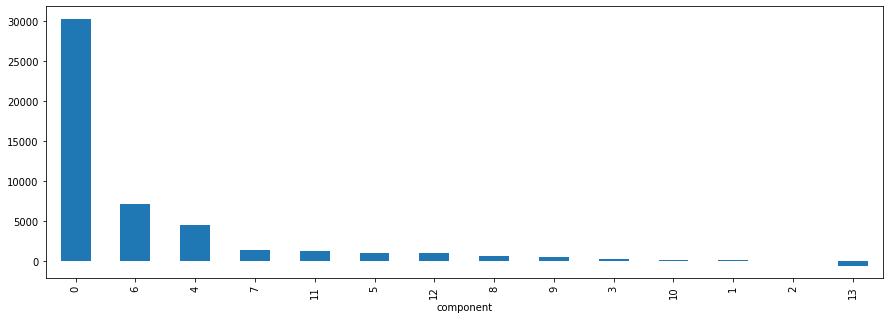

In [ ]:
component_profit = {}
for i, contr in components_id.items():
    component_profit[i] = arb[arb.tx_id.isin(arb_txs[arb_txs.pool_name.isin(components_id[i])].tx_id)].profit.sum()
pd.DataFrame(component_profit.items(),columns=['component','profit'])\
            .set_index('component').profit.sort_values(ascending=False).plot(kind='bar')


**Most profitable trades**

In [ ]:
most_profit = arb[['profit','tx_id']].set_index('tx_id').profit.sort_values(ascending=False).head(10)


In [ ]:
tx_path = arb_txs[(arb_txs.tx_id.isin(most_profit.index.tolist()))&(arb_txs.msg_index==0)]\
                [['tx_id','pool_contract_address']]\
                .rename(columns={'pool_contract_address':f'pool_contract_address_{0}'})
for i in range(1,10):
    tx_path_next = arb_txs[(arb_txs.tx_id.isin(most_profit.index.tolist()))&(arb_txs.msg_index==i)]\
                    [['tx_id','pool_contract_address']]\
                    .rename(columns={'pool_contract_address':f'pool_contract_address_{i}'})
    tx_path=tx_path.merge(tx_path_next,how='left',on='tx_id')
tx_path


,tx_id,pool_contract_address_0,pool_contract_address_1,pool_contract_address_2,pool_contract_address_3,pool_contract_address_4,pool_contract_address_5,pool_contract_address_6,pool_contract_address_7,pool_contract_address_8,pool_contract_address_9
0,32848B837CFD6D84C1157839EB6189366700565987F8F93848407F5D4EAC7B70,terra1gm5p3ner9x9xpwugn9sp6gvhd0lwrtkyrecdn3,terra10dtff8drpwtfx4976m7cxwpptfy87l5p264xgy,terra18adm0emn6j3pnc90ldechhun62y898xrdmfgfz,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16117CCECD192D94ED00FFE09596AC8531DACE407DC0026C677A717088F3158A,terra1qpd9n7afwf45rkjlpujrrdfh83pldec8rpujgn,terra1jxazgm67et0ce260kvrpfv50acuushpjsz2y0p,terra1tndcaqxkpc5ce9qee5ggqf430mr2z3pefe5wj6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42AAF913390A56A86124F1D315C7841A8AAD78DEB39659941123D153163C11D5,terra163pkeeuwxzr0yhndf8xd2jprm9hrtk59xf7nqf,terra14zhkur7l7ut7tx6kvj28fp5q982lrqns59mnp3,terra1tfrecwlvzcv9h697q3g0d08vd53ssu5w4war4n,terra1c0afrdc5253tkp5wt7rxhuj42xwyf2lcre0s7c,NaN,NaN,NaN,NaN,NaN,NaN
3,3A12F0E864BF4C0A1AD53ED9197738BFAB17B57B414D5DE39D6B2F2BE65AD81B,terra106a00unep7pvwvcck4wylt4fffjhgkf9a0u6eu,terra1tus5ec9qsdht8dapq9ldfnsf8eehnfmwvsut83,terra1sgu6yca6yjk0a34l86u6ju4apjcd6refwuhgzv,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5607BDA9440DE113D7F6F08BADCA5AEAB3F5028ED98D5E5944EA6668D190FA1B,terra1yjmpu9c3dzknf8axtp6k74nvkwrd457u7p2sdr,terra1uyvksaz9xpgxpqnq8vz9vzg59up8mlhx3463tf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,73E5A39AFE0AC835B04AC055E60F691E09EF767819C647A34FDE202DED28EF58,terra163pkeeuwxzr0yhndf8xd2jprm9hrtk59xf7nqf,terra14zhkur7l7ut7tx6kvj28fp5q982lrqns59mnp3,terra1tfrecwlvzcv9h697q3g0d08vd53ssu5w4war4n,terra1c0afrdc5253tkp5wt7rxhuj42xwyf2lcre0s7c,NaN,NaN,NaN,NaN,NaN,NaN
6,F7C5E91B81AD569BE22EDF8B868DB238B971309E58AA8496D592F52008B7D169,terra15s2wgdeqhuc4gfg7sfjyaep5cch38mwtzmwqrx,terra1e59utusv5rspqsu8t37h5w887d9rdykljedxw0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,B342DE77F0A651C4587AF7C7D48DD673DE3C2F1A30ADCAC9D8CAD01824B86E4F,terra1z6tp0ruxvynsx5r9mmcc2wcezz9ey9pmrw5r8g,terra1mxyp5z27xxgmv70xpqjk7jvfq54as9dfzug74m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,36ADDA8B5018B1164E771F204E858A95ABA1E02BA72EFA0D86C72BB75B5A32E5,terra1ykfz4hrq8en2f098j8a4ppaq8u8hangpw9tnqu,terra1nmheu06jz6mxsg5n8nnmyn6fxgnvxzk28femx2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8C9427478AC6FCAA6B18A89C5D852E7CC565881ACB22BA787E8AD1A25F6C52DE,terra1nmheu06jz6mxsg5n8nnmyn6fxgnvxzk28femx2,terra1ykfz4hrq8en2f098j8a4ppaq8u8hangpw9tnqu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**N° bots over time**

<AxesSubplot:xlabel='year_month_day'>

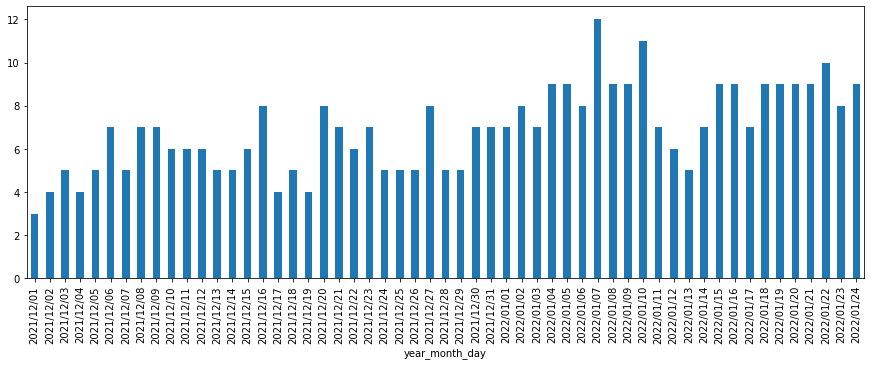

In [ ]:
arb_txs.groupby('year_month_day').sender.nunique().plot(kind='bar')

**Txs over time**

<AxesSubplot:xlabel='year_month_day'>

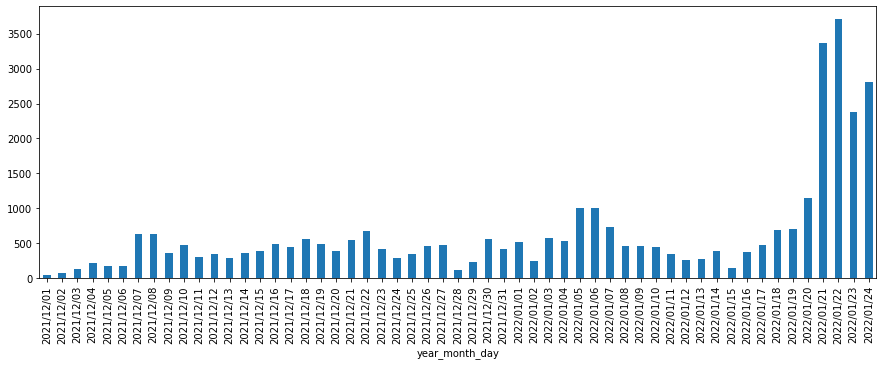

In [ ]:
arb_txs.groupby('year_month_day').tx_id.count().plot(kind='bar')

**Average profit over time**

<AxesSubplot:xlabel='year_month_day'>

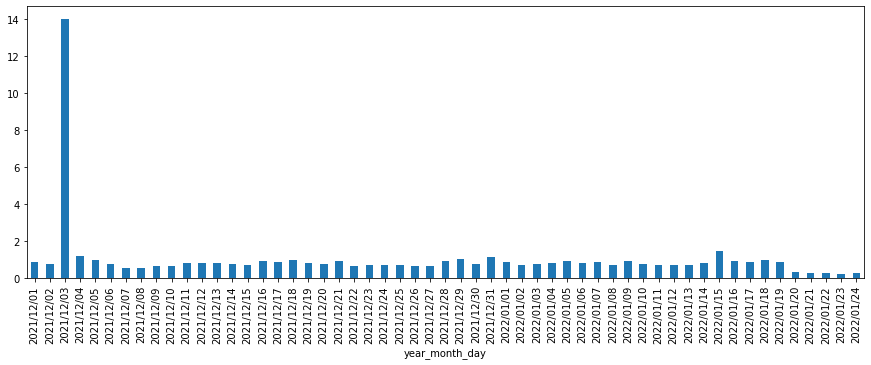

In [ ]:
arb[['tx_id','profit']].merge(arb_txs[['tx_id','year_month_day']], on='tx_id')\
            .groupby('year_month_day')\
            .profit.median()\
            .plot(kind='bar')

**Max profit txs**

In [ ]:
arb.loc[arb.profit.idxmax()]

ask_asset_first                                    terra1nef5jf6c7js9x6gkntlehgywvjlpytm7pcgkn4
block_timestamp_first                                                2021-12-20 03:00:57.673000
from__first                                        terra106a00unep7pvwvcck4wylt4fffjhgkf9a0u6eu
msg_index_first                                                                               0
offer_amount_first                                                                22635011417.0
offer_asset_first                                                                          uusd
pool_contract_address_first                        terra106a00unep7pvwvcck4wylt4fffjhgkf9a0u6eu
return_amount_first                                                               90776319604.0
sender_first                                       terra163duvmyt7h6uzyc4jnzl607wdrvftnv8ar3epf
to__first                                          terra163duvmyt7h6uzyc4jnzl607wdrvftnv8ar3epf
tx_id                          3A12F0E86

**Total profitted UST**

<AxesSubplot:xlabel='sender_first_short'>

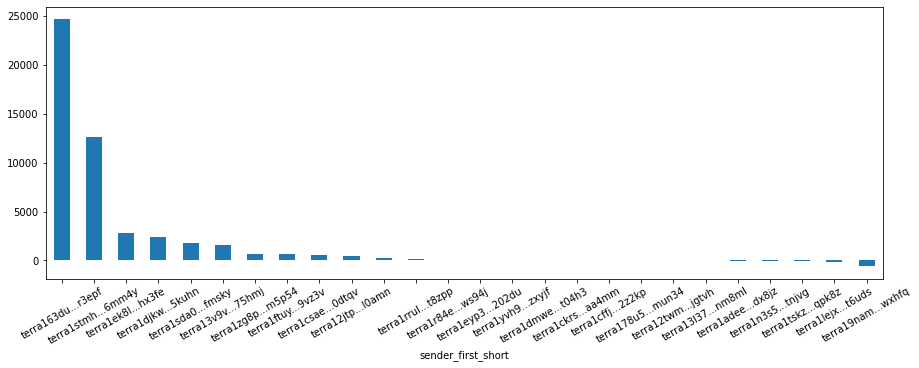

In [ ]:
addr_profit = arb.groupby('sender_first_short').profit.sum().sort_values(ascending=False)
df = addr_profit.head(10).reset_index()
df['Y'] = 1
df.to_csv('./top_profit_addr.csv')
addr_profit.plot(kind='bar',rot=30)

In [ ]:
addr_profit = arb.groupby('sender_first_short').profit.sum().reset_index()
addr_txs = arb.groupby('sender_first_short').tx_id.count().reset_index()

In [ ]:
df = addr_profit.merge(addr_txs, on='sender_first_short')
df[df.sender_first_short!='...'].rename(columns={
    'sender_first_short':'Address',
    'profit':'Net arbitrage profit (UST)',
    'tx_id':'Number of arbitrage transactions'
})\
        .to_csv('./txs_profit_addr.csv')

**Most central nodes**

Top 20 nodes by degree:


<AxesSubplot:xlabel='pool_name'>

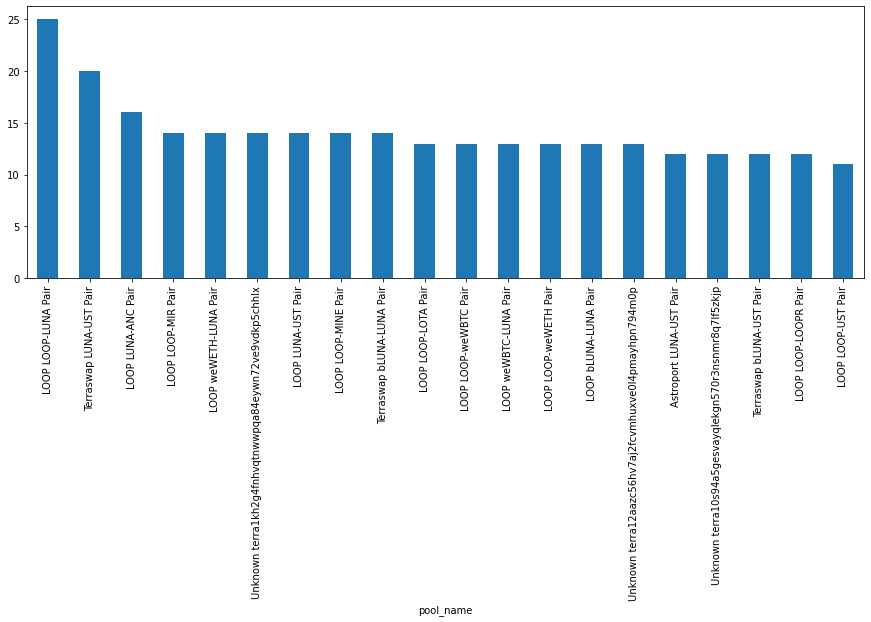

In [ ]:
from operator import itemgetter
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
df = pd.DataFrame(sorted_degree, columns=['pool_name','degree'])\
            .set_index('pool_name').degree.sort_values(ascending=False)
df.head(20).plot(kind='bar')

**Query**

In [ ]:
arb_txs[arb_txs.pool_contract_address.str.contains('wcf')].pool_contract_address

11539    terra1uxf47plxtc9tj4lnfwrlah0xp04hhhquye0wcf
24781    terra1uxf47plxtc9tj4lnfwrlah0xp04hhhquye0wcf
26321    terra1uxf47plxtc9tj4lnfwrlah0xp04hhhquye0wcf
32576    terra1uxf47plxtc9tj4lnfwrlah0xp04hhhquye0wcf
32617    terra1uxf47plxtc9tj4lnfwrlah0xp04hhhquye0wcf
                             ...                     
52447    terra1uxf47plxtc9tj4lnfwrlah0xp04hhhquye0wcf
52883    terra1uxf47plxtc9tj4lnfwrlah0xp04hhhquye0wcf
61717    terra1uxf47plxtc9tj4lnfwrlah0xp04hhhquye0wcf
62999    terra1uxf47plxtc9tj4lnfwrlah0xp04hhhquye0wcf
63001    terra1uxf47plxtc9tj4lnfwrlah0xp04hhhquye0wcf
Name: pool_contract_address, Length: 141, dtype: object

In [ ]:
arb_txs[arb_txs.pool_contract_address=='terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25']

,ask_asset,block_timestamp,from_,msg_index,offer_amount,offer_asset,pool_contract_address,return_amount,sender,to_,tx_id,month_day,year_month_day,pool_name,protocol,component_id
33916,terra1xj49zyqrwpv5k928jwfpfy2ha668nwdgkwlrg3,2021-12-29 13:47:55.463000,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,0,100000000.0,uusd,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,62104171.0,terra1zg8px6tw0nhq6u85lv4ne3xmaq4zrjlxjm5p54,terra1zg8px6tw0nhq6u85lv4ne3xmaq4zrjlxjm5p54,E39A160E6571990B10D31AE1DB0AB9CC8BA219EE2992FF9B11E641E08D774B84,12/29,2021/12/29,Terraswap ASTRO-UST LP,Terraswap,1.0
34024,terra1xj49zyqrwpv5k928jwfpfy2ha668nwdgkwlrg3,2021-12-29 15:08:53.085000,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,0,150000000.0,uusd,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,92565167.0,terra1zg8px6tw0nhq6u85lv4ne3xmaq4zrjlxjm5p54,terra1zg8px6tw0nhq6u85lv4ne3xmaq4zrjlxjm5p54,C243840CF1C412E58A1138C31357BF1D35D73ED5110B9AA04A2D8A4486172AB4,12/29,2021/12/29,Terraswap ASTRO-UST LP,Terraswap,1.0
34042,terra1xj49zyqrwpv5k928jwfpfy2ha668nwdgkwlrg3,2021-12-29 15:25:44.661000,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,0,150000000.0,uusd,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,92612033.0,terra1zg8px6tw0nhq6u85lv4ne3xmaq4zrjlxjm5p54,terra1zg8px6tw0nhq6u85lv4ne3xmaq4zrjlxjm5p54,EB748EA70AC6E66BC7A32664172705E6298A252D8807B82329BE7D6FAA77F61D,12/29,2021/12/29,Terraswap ASTRO-UST LP,Terraswap,1.0
34134,uusd,2021-12-29 16:42:02.044000,terra1zg8px6tw0nhq6u85lv4ne3xmaq4zrjlxjm5p54,1,91727813.0,terra1xj49zyqrwpv5k928jwfpfy2ha668nwdgkwlrg3,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,150625563.0,terra1zg8px6tw0nhq6u85lv4ne3xmaq4zrjlxjm5p54,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,82A57802782BAFA79C22AA2A534AC36565300CC158866A13959E6D09AEEA2099,12/29,2021/12/29,Terraswap ASTRO-UST LP,Terraswap,1.0
34233,uusd,2021-12-29 18:11:05.347000,terra1zg8px6tw0nhq6u85lv4ne3xmaq4zrjlxjm5p54,1,92198917.0,terra1xj49zyqrwpv5k928jwfpfy2ha668nwdgkwlrg3,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,150805800.0,terra1zg8px6tw0nhq6u85lv4ne3xmaq4zrjlxjm5p54,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,9BE4B82CCE6676BB7E0E5597DBAC8CE271FD5CAA40C3F190814BCA339017AAE8,12/29,2021/12/29,Terraswap ASTRO-UST LP,Terraswap,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78989,terra1xj49zyqrwpv5k928jwfpfy2ha668nwdgkwlrg3,2022-01-24 10:02:08.563000,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,0,147848810.0,uusd,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,150112070.0,terra1ek8l68azgkr9cgqf680mqwpsj7yznc8xxhx3fe,terra1ek8l68azgkr9cgqf680mqwpsj7yznc8xxhx3fe,94CCD735E2B844F01B686ED4EA28E539835CB2812610BF5C5F0BA68CB2CCC170,01/24,2022/01/24,Terraswap ASTRO-UST LP,Terraswap,1.0
79198,uusd,2022-01-24 10:31:17.309000,terra1ek8l68azgkr9cgqf680mqwpsj7yznc8xxhx3fe,1,132753776.0,terra1xj49zyqrwpv5k928jwfpfy2ha668nwdgkwlrg3,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,131654272.0,terra1ek8l68azgkr9cgqf680mqwpsj7yznc8xxhx3fe,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,482B38A1353A3CDEC4AC497BDB99C3D6381F9AFFB2A8942A339D4A771F0E72D5,01/24,2022/01/24,Terraswap ASTRO-UST LP,Terraswap,1.0
79928,terra1xj49zyqrwpv5k928jwfpfy2ha668nwdgkwlrg3,2022-01-24 14:15:13.382000,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,0,243274941.0,uusd,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,249912476.0,terra1ek8l68azgkr9cgqf680mqwpsj7yznc8xxhx3fe,terra1ek8l68azgkr9cgqf680mqwpsj7yznc8xxhx3fe,085623DB7F0C65FC502D712A0724B71BE5E01D9B727C44579E4F0847E23403F0,01/24,2022/01/24,Terraswap ASTRO-UST LP,Terraswap,1.0
80545,uusd,2022-01-24 15:59:45.488000,terra1ek8l68azgkr9cgqf680mqwpsj7yznc8xxhx3fe,1,116021020.0,terra1xj49zyqrwpv5k928jwfpfy2ha668nwdgkwlrg3,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,113916622.0,terra1ek8l68azgkr9cgqf680mqwpsj7yznc8xxhx3fe,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,17283A90D9DC2B7214AA00680AD16083EBC216A954F9F579D1F99E4EBC850C8B,01/24,2022/01/24,Terraswap ASTRO-UST LP,Terraswap,1.0


In [ ]:
arb_txs[arb_txs.tx_id=='1E120C347939CCBC107304C3EF175BECEE237EFF33D3543FCD486F30D5BAC97F']

,ask_asset,block_timestamp,from_,msg_index,offer_amount,offer_asset,pool_contract_address,return_amount,sender,to_,tx_id,month_day,year_month_day,pool_name,protocol,component_id
4126,uusd,2021-12-04 20:13:58.246000,terra163duvmyt7h6uzyc4jnzl607wdrvftnv8ar3epf,2,2.969169e+08,terra14z56l0fp2lsf86zy3hty2z47ezkhnthtr9yq76,terra1gm5p3ner9x9xpwugn9sp6gvhd0lwrtkyrecdn3,1.184477e+09,terra163duvmyt7h6uzyc4jnzl607wdrvftnv8ar3epf,terra1gm5p3ner9x9xpwugn9sp6gvhd0lwrtkyrecdn3,1E120C347939CCBC107304C3EF175BECEE237EFF33D3543FCD486F30D5BAC97F,12/04,2021/12/04,Terraswap ANC-UST Pair,Terraswap,0.0
4127,terra1nef5jf6c7js9x6gkntlehgywvjlpytm7pcgkn4,2021-12-04 20:13:58.246000,terra106a00unep7pvwvcck4wylt4fffjhgkf9a0u6eu,0,1.153023e+09,uusd,terra106a00unep7pvwvcck4wylt4fffjhgkf9a0u6eu,7.720064e+09,terra163duvmyt7h6uzyc4jnzl607wdrvftnv8ar3epf,terra163duvmyt7h6uzyc4jnzl607wdrvftnv8ar3epf,1E120C347939CCBC107304C3EF175BECEE237EFF33D3543FCD486F30D5BAC97F,12/04,2021/12/04,LOOP LOOP-UST Pair,Loop,0.0
4128,terra14z56l0fp2lsf86zy3hty2z47ezkhnthtr9yq76,2021-12-04 20:13:58.246000,terra163duvmyt7h6uzyc4jnzl607wdrvftnv8ar3epf,1,7.720064e+09,terra1nef5jf6c7js9x6gkntlehgywvjlpytm7pcgkn4,terra1w7hny2catfwsv6dq8gfm4zgazx3hmpl3xwzxya,2.969169e+08,terra163duvmyt7h6uzyc4jnzl607wdrvftnv8ar3epf,terra1w7hny2catfwsv6dq8gfm4zgazx3hmpl3xwzxya,1E120C347939CCBC107304C3EF175BECEE237EFF33D3543FCD486F30D5BAC97F,12/04,2021/12/04,LOOP LUNA-ANC Pair,Loop,0.0


In [ ]:
contracts[contracts.mainnet=='terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25']

,id,name,protocol,icon,tags,mainnet,testnet
22,TERRASWAP_ASTRO-UST_LP_2,ASTRO-UST LP,Terraswap,https://finder.extraterrestrial.money/images/SVG/ASTRO.svg,NaN,terra1pufczag48fwqhsmekfullmyu02f93flvfc9a25,NaN


## Appendix
### Data preparation

**Imports**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress
import warnings
import json
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.options.display.max_colwidth = 10000

In [ ]:
url_tx = 'https://api.flipsidecrypto.com/api/v2/queries/79bcdde1-d2fc-4d73-b899-0502f9ee778c/data/latest'
url_tx2 = 'https://api.flipsidecrypto.com/api/v2/queries/020e2f1c-d4e2-492a-b584-1ff332d57c92/data/latest'
url_tx3 = 'https://api.flipsidecrypto.com/api/v2/queries/d112a913-8be6-450a-a44c-b098a1c8b8d6/data/latest'
url_tx4 = 'https://api.flipsidecrypto.com/api/v2/queries/fe7e1669-2321-4ee0-bb0b-79c707bee08c/data/latest'


In [ ]:
tx_raw = pd.read_json(url_tx).append(pd.read_json(url_tx2))\
                            .append(pd.read_json(url_tx3))\
                            .append(pd.read_json(url_tx4))
tx_raw.shape

(158877, 12)

In [ ]:
tx_raw.columns

Index(['ASK_ASSET', 'BLOCK_TIMESTAMP', 'EVENT_ATTRIBUTES', 'FROM_',
       'MSG_INDEX', 'OFFER_AMOUNT', 'OFFER_ASSET', 'POOL_CONTRACT_ADDRESS',
       'RETURN_AMOUNT', 'SENDER', 'TO_', 'TX_ID'],
      dtype='object')

**Preparation**

In [ ]:
txs = tx_raw[['ASK_ASSET', 'BLOCK_TIMESTAMP', 'FROM_',
       'MSG_INDEX', 'OFFER_AMOUNT', 'OFFER_ASSET', 'POOL_CONTRACT_ADDRESS',
       'RETURN_AMOUNT', 'SENDER', 'TO_', 'TX_ID']]
txs.columns = [s.lower() for s in txs.columns]
txs.block_timestamp = pd.to_datetime(txs.block_timestamp)
txs.sender=txs.sender.apply(lambda x: x.replace("\"","") if x else '')
txs.from_=txs.from_.apply(lambda x: x.replace("\"","") if x else '')
txs.offer_asset=txs.offer_asset.apply(lambda x: x.replace("\"","") if x else '')
txs.to_=txs.to_.apply(lambda x: x.replace("\"","") if x else '')
txs.pool_contract_address=txs.pool_contract_address.apply(lambda x: x.replace("\"","") if x else '')
txs['month_day'] = txs.block_timestamp.apply(lambda b: f"{'{:02}'.format(b.month)}/{'{:02}'.format(b.day)}")
txs['year_month_day'] = txs.block_timestamp.apply(lambda b: f"{b.year}/{'{:02}'.format(b.month)}/{'{:02}'.format(b.day)}")


**Filter only txs with the right chain of assets**

In [ ]:
approved_tx_ids = set()
tx_ids = txs.tx_id.unique()
print(len(tx_ids))
for i in range(0,10):
    txs_index = txs[txs.tx_id.isin(tx_ids)].groupby('tx_id').msg_index.max()
    approved_tx_ids.update(txs_index[txs_index < i].index.tolist())

    ind_i = txs[txs.tx_id.isin(tx_ids)&(txs.msg_index==i)][['tx_id','offer_asset','offer_amount','ask_asset','return_amount']]
    ind_ii = txs[txs.msg_index==(i+1)][['tx_id','offer_asset','offer_amount','ask_asset','return_amount']]
    ind_iii = ind_i.merge(ind_ii,on='tx_id',how='left',suffixes=[f'_{i}',f'_{i+1}']) 
    if(i==0):
        ind_iii = ind_iii[(ind_iii[f'ask_asset_{i}']==ind_iii[f'offer_asset_{i+1}'])]
    else:
        ind_iii = ind_iii[(ind_iii[f'ask_asset_{i}']==ind_iii[f'offer_asset_{i+1}'])|(ind_iii[f'offer_asset_{i+1}'].isna())]
    tx_ids = ind_iii.tx_id.unique()
    print('Approved: ', len(approved_tx_ids))
    print('To next stage: ',len(tx_ids))
    if(i==5):
        approved_tx_ids.update(tx_ids)
        print('Approved: ', len(approved_tx_ids))

40695
Approved:  0
To next stage:  11209
Approved:  0
To next stage:  11064
Approved:  3357
To next stage:  7698
Approved:  7064
To next stage:  3970
Approved:  10209
To next stage:  824
Approved:  10965
To next stage:  68
Approved:  11033
Approved:  11033
To next stage:  12
Approved:  11033
To next stage:  1
Approved:  11033
To next stage:  0
Approved:  11033
To next stage:  0


In [ ]:
arb_txs = txs[txs.tx_id.isin(approved_tx_ids)]

### Txs to split

In [ ]:
arb_0 = arb_txs[arb_txs.msg_index==0][['tx_id','offer_asset']]
for i in range(1,10):
    print('Iteration:',i)
    tmp = arb_0.merge(arb_txs[arb_txs.msg_index==i][['tx_id','ask_asset']],on='tx_id')
    tmp['msg_index'] = i
    if i==1:
        txs_end = tmp[tmp.offer_asset==tmp.ask_asset]
    else:
        txs_end=txs_end.append(tmp[tmp.offer_asset==tmp.ask_asset])
    print(len(txs_end))

Iteration: 1
3292
Iteration: 2
6936
Iteration: 3
10082
Iteration: 4
10838
Iteration: 5
10894
Iteration: 6
10905
Iteration: 7
10906
Iteration: 8
10906
Iteration: 9
10906


In [ ]:
s = txs_end.groupby('tx_id').msg_index.count()
to_split = txs_end[txs_end.tx_id.isin(s[s>1].index.tolist())].sort_values(by='tx_id')
to_split=to_split.groupby(['tx_id','offer_asset','ask_asset']).msg_index.min().reset_index()

In [ ]:
arb_txs_no_split = arb_txs[~(arb_txs.tx_id.isin(to_split.tx_id))]

In [ ]:
to_split_txs = arb_txs[(arb_txs.tx_id.isin(to_split.tx_id))]
to_split_txs = to_split_txs.merge(to_split, on=['tx_id'], suffixes=['','_split'])
split_left = to_split_txs[to_split_txs.msg_index<=to_split_txs.msg_index_split]
split_right = to_split_txs[to_split_txs.msg_index>to_split_txs.msg_index_split]

In [ ]:
split_right['tx_id'] = split_right.tx_id + '_2'

In [ ]:
split_right['msg_index']=split_right\
                            .sort_values(by=['tx_id','msg_index'])\
                            .groupby(['tx_id']).cumcount()

In [ ]:
arb_txs = arb_txs_no_split.append(split_right[arb_txs_no_split.columns])\
                .append(split_left[arb_txs_no_split.columns])

In [ ]:
contracts = pd.read_csv('../../contracts.csv').append(pd.read_csv('../../contracts_new.csv'))
contracts.head()

,id,name,protocol,icon,tags,mainnet,testnet
0,TERRASWAP_ASSET_LIMIT_ORDER,Assert Limit Order,Terraswap,https://whitelist.mirror.finance/icon/terraswap.png,NaN,terra1vs9jr7pxuqwct3j29lez3pfetuu8xmq7tk3lzk,NaN
1,TERRASWAP_ROUTE_SWAP,Route Swap,Terraswap,https://whitelist.mirror.finance/icon/terraswap.png,NaN,terra19qx5xe6q9ll4w0890ux7lv2p4mf3csd4qvt3ex,NaN
2,TERRASWAP_TOKENFACTORY,TokenFactory,Terraswap,https://whitelist.mirror.finance/icon/terraswap.png,NaN,terra1ulgw0td86nvs4wtpsc80thv6xelk76ut7a7apj,terra18qpjm4zkvqnpjpw0zn0tdr8gdzvt8au35v45xf
3,TERRASWAP_ALTE-UST_PAIR,ALTE-UST Pair,Terraswap,https://raw.githubusercontent.com/etfinder/assets/master/extra/icon/60/ALTE60.png,Altered,terra18adm0emn6j3pnc90ldechhun62y898xrdmfgfz,NaN
4,TERRASWAP_ALTE-UST_LP,ALTE-UST LP,Terraswap,https://raw.githubusercontent.com/etfinder/assets/master/extra/icon/60/ALTE60.png,Altered,terra1x3musrr03tl3dy9xhagm6r5nthwwxgx0hezc79,NaN


In [ ]:
contract_name = contracts.set_index('mainnet').name.to_dict()
contract_protocol = contracts.set_index('mainnet').protocol.to_dict()

In [ ]:
arb_txs.dtypes

ask_asset                 object
block_timestamp           object
from_                     object
msg_index                  int64
offer_amount             float64
offer_asset               object
pool_contract_address     object
return_amount            float64
sender                    object
to_                       object
tx_id                     object
month_day                 object
year_month_day            object
dtype: object

In [ ]:
def contract_full_name(row):
    if(str(row['protocol']).upper() in row.pool_name):
        return row.pool_name
    else:
        return  str(row['protocol']) + ' ' + row.pool_name
                                                        
arb_txs['pool_name']=arb_txs.pool_contract_address.apply(lambda x: contract_name[x] if x in contract_name else x)
arb_txs['protocol']=arb_txs.pool_contract_address.apply(lambda x: contract_protocol[x] if x in contract_protocol else 'Unknown')
arb_txs['pool_name']= arb_txs.apply(contract_full_name,axis=1)

In [ ]:
arb_txs[arb_txs.pool_name.str.contains('MIR')].pool_contract_address.unique()

array(['terra1cpzkckgzz90pq8fkumdjc58ee5llrxt2yka9fp',
       'terra1amv303y8kzxuegvurh0gug2xe9wkgj65enq2ux',
       'terra13ay3hftcft25uazl76q8gmdk993y9nyv9avu2h'], dtype=object)

In [ ]:
arb_txs.block_timestamp.max()

datetime.datetime(2022, 1, 24, 19, 25, 18, 791000)

### Query

with tx_pool as (
  select tx_id, msg_index,
  case 
  		when (EVENT_ATTRIBUTES:"0_action" = 'swap' and EVENT_ATTRIBUTES:"0_offer_asset" is not null) then EVENT_ATTRIBUTES:"0_offer_asset"
  		when (EVENT_ATTRIBUTES:"1_action" = 'swap' and EVENT_ATTRIBUTES:"1_offer_asset" is not null) then EVENT_ATTRIBUTES:"1_offer_asset"
  		when (EVENT_ATTRIBUTES:"2_action" = 'swap' and EVENT_ATTRIBUTES:"2_offer_asset" is not null) then EVENT_ATTRIBUTES:"2_offer_asset"
  		when (EVENT_ATTRIBUTES:"3_action" = 'swap' and EVENT_ATTRIBUTES:"3_offer_asset" is not null) then EVENT_ATTRIBUTES:"3_offer_asset"
  		when (EVENT_ATTRIBUTES:"4_action" = 'swap' and EVENT_ATTRIBUTES:"4_offer_asset" is not null) then EVENT_ATTRIBUTES:"4_offer_asset"
  		when (EVENT_ATTRIBUTES:"action" = 'swap' and EVENT_ATTRIBUTES:"offer_asset" is not null) then EVENT_ATTRIBUTES:"offer_asset"
  		else EVENT_ATTRIBUTES:"offer_asset"
  end offer_asset
  /*,
  case 
  		when (EVENT_ATTRIBUTES:"0_action" = 'swap') then EVENT_ATTRIBUTES:"0_contract_address"
  		when (EVENT_ATTRIBUTES:"1_action" = 'swap') then EVENT_ATTRIBUTES:"1_contract_address"
  		when (EVENT_ATTRIBUTES:"2_action" = 'swap') then EVENT_ATTRIBUTES:"2_contract_address"
  		when (EVENT_ATTRIBUTES:"3_action" = 'swap') then EVENT_ATTRIBUTES:"3_contract_address"
  		when (EVENT_ATTRIBUTES:"4_action" = 'swap') then EVENT_ATTRIBUTES:"4_contract_address"
  		when (EVENT_ATTRIBUTES:"5_action" = 'swap') then EVENT_ATTRIBUTES:"5_contract_address"
  		when (EVENT_ATTRIBUTES:"6_action" = 'swap') then EVENT_ATTRIBUTES:"6_contract_address"
  		when (EVENT_ATTRIBUTES:"7_action" = 'swap') then EVENT_ATTRIBUTES:"7_contract_address"
  		when (EVENT_ATTRIBUTES:"8_action" = 'swap') then EVENT_ATTRIBUTES:"8_contract_address"
  		when (EVENT_ATTRIBUTES:"9_action" = 'swap') then EVENT_ATTRIBUTES:"9_contract_address"
  		when (EVENT_ATTRIBUTES:"farmer" is not null) then EVENT_ATTRIBUTES:"0_to" --Nexus bLuna nLuna swap
  		when (EVENT_ATTRIBUTES:"action" = 'swap') then EVENT_ATTRIBUTES:"contract_address"
  		else 'bo'
    end pool_contract_address*/
  from terra.msg_events
  where event_type='from_contract'
  and tx_status='SUCCEEDED'
  and block_timestamp > '2021-12-01T00:00:00Z'::TIMESTAMP_NTZ
  and msg_index=0
),
tx_count as (
  select tx_id
  from terra.msg_events
  where event_type='from_contract'
  and tx_status='SUCCEEDED'
  and block_timestamp > '2021-12-01T00:00:00Z'::TIMESTAMP_NTZ
  group by 1
  having count(*) > 1
)

select 
  	block_timestamp,
  	tx_id, msg_index,
  	coalesce(EVENT_ATTRIBUTES:"to",EVENT_ATTRIBUTES:"0_to") to_,
    coalesce(EVENT_ATTRIBUTES:"from",EVENT_ATTRIBUTES:"0_from") from_,
    coalesce(EVENT_ATTRIBUTES:"sender",EVENT_ATTRIBUTES:"sender") sender,
    case 
  		
  		when (EVENT_ATTRIBUTES:"0_action" = 'swap' or (EVENT_ATTRIBUTES:"0_action" = 'redeem_stable')) then EVENT_ATTRIBUTES:"0_contract_address"
  		when ((EVENT_ATTRIBUTES:"1_action" = 'swap') or (EVENT_ATTRIBUTES:"1_action" = 'redeem_stable')) then EVENT_ATTRIBUTES:"1_contract_address"
  		when (EVENT_ATTRIBUTES:"2_action" = 'swap' or (EVENT_ATTRIBUTES:"2_action" = 'redeem_stable')) then EVENT_ATTRIBUTES:"2_contract_address"
  		when (EVENT_ATTRIBUTES:"3_action" = 'swap') then EVENT_ATTRIBUTES:"3_contract_address"
  		when (EVENT_ATTRIBUTES:"4_action" = 'swap') then EVENT_ATTRIBUTES:"4_contract_address"
  		when (EVENT_ATTRIBUTES:"5_action" = 'swap') then EVENT_ATTRIBUTES:"5_contract_address"
  		when (EVENT_ATTRIBUTES:"6_action" = 'swap') then EVENT_ATTRIBUTES:"6_contract_address"
  		when (EVENT_ATTRIBUTES:"7_action" = 'swap') then EVENT_ATTRIBUTES:"7_contract_address"
  		when (EVENT_ATTRIBUTES:"8_action" = 'swap') then EVENT_ATTRIBUTES:"8_contract_address"
  		when (EVENT_ATTRIBUTES:"9_action" = 'swap') then EVENT_ATTRIBUTES:"9_contract_address"
  		when (EVENT_ATTRIBUTES:"farmer" is not null) then EVENT_ATTRIBUTES:"0_to" --Nexus bLuna nLuna swap
  		when (EVENT_ATTRIBUTES:"action" = 'swap') then EVENT_ATTRIBUTES:"contract_address"
  		else 'bo'
    end pool_contract_address,
    case 
  		when (EVENT_ATTRIBUTES:"0_action" = 'swap' and EVENT_ATTRIBUTES:"0_ask_asset" is not null) then EVENT_ATTRIBUTES:"0_ask_asset"
  		when (EVENT_ATTRIBUTES:"1_action" = 'swap' and EVENT_ATTRIBUTES:"1_ask_asset" is not null) then EVENT_ATTRIBUTES:"1_ask_asset"
  		when (EVENT_ATTRIBUTES:"2_action" = 'swap' and EVENT_ATTRIBUTES:"2_ask_asset" is not null) then EVENT_ATTRIBUTES:"2_ask_asset"
  		when (EVENT_ATTRIBUTES:"3_action" = 'swap' and EVENT_ATTRIBUTES:"3_ask_asset" is not null) then EVENT_ATTRIBUTES:"3_ask_asset"
  		when (EVENT_ATTRIBUTES:"4_action" = 'swap' and EVENT_ATTRIBUTES:"4_ask_asset" is not null) then EVENT_ATTRIBUTES:"4_ask_asset"
  		when (EVENT_ATTRIBUTES:"action" = 'swap' and EVENT_ATTRIBUTES:"ask_asset" is not null) then EVENT_ATTRIBUTES:"ask_asset"
  		else EVENT_ATTRIBUTES:"ask_asset"
    end ask_asset,
  	case 
  		when (EVENT_ATTRIBUTES:"0_action" = 'swap' and EVENT_ATTRIBUTES:"0_return_amount" is not null) then EVENT_ATTRIBUTES:"0_return_amount"
  		when (EVENT_ATTRIBUTES:"1_action" = 'swap' and EVENT_ATTRIBUTES:"1_return_amount" is not null) then EVENT_ATTRIBUTES:"1_return_amount"
  		when (EVENT_ATTRIBUTES:"2_action" = 'swap' and EVENT_ATTRIBUTES:"2_return_amount" is not null) then EVENT_ATTRIBUTES:"2_return_amount"
  		when (EVENT_ATTRIBUTES:"3_action" = 'swap' and EVENT_ATTRIBUTES:"3_return_amount" is not null) then EVENT_ATTRIBUTES:"3_return_amount"
  		when (EVENT_ATTRIBUTES:"4_action" = 'swap' and EVENT_ATTRIBUTES:"4_return_amount" is not null) then EVENT_ATTRIBUTES:"4_return_amount"
  		when (EVENT_ATTRIBUTES:"action" = 'swap' and EVENT_ATTRIBUTES:"return_amount" is not null) then EVENT_ATTRIBUTES:"return_amount"
  		else EVENT_ATTRIBUTES:"return_amount"
    end return_amount,
  	case 
  		when (EVENT_ATTRIBUTES:"0_action" = 'swap' and EVENT_ATTRIBUTES:"0_offer_amount" is not null) then EVENT_ATTRIBUTES:"0_offer_amount"
  		when (EVENT_ATTRIBUTES:"1_action" = 'swap' and EVENT_ATTRIBUTES:"1_offer_amount" is not null) then EVENT_ATTRIBUTES:"1_offer_amount"
  		when (EVENT_ATTRIBUTES:"2_action" = 'swap' and EVENT_ATTRIBUTES:"2_offer_amount" is not null) then EVENT_ATTRIBUTES:"2_offer_amount"
  		when (EVENT_ATTRIBUTES:"3_action" = 'swap' and EVENT_ATTRIBUTES:"3_offer_amount" is not null) then EVENT_ATTRIBUTES:"3_offer_amount"
  		when (EVENT_ATTRIBUTES:"4_action" = 'swap' and EVENT_ATTRIBUTES:"4_offer_amount" is not null) then EVENT_ATTRIBUTES:"4_offer_amount"
  		when (EVENT_ATTRIBUTES:"action" = 'swap' and EVENT_ATTRIBUTES:"offer_amount" is not null) then EVENT_ATTRIBUTES:"offer_amount"
  		else EVENT_ATTRIBUTES:"offer_amount"
    end offer_amount,
    case 
  		when (EVENT_ATTRIBUTES:"0_action" = 'swap' and EVENT_ATTRIBUTES:"0_offer_asset" is not null) then EVENT_ATTRIBUTES:"0_offer_asset"
  		when (EVENT_ATTRIBUTES:"1_action" = 'swap' and EVENT_ATTRIBUTES:"1_offer_asset" is not null) then EVENT_ATTRIBUTES:"1_offer_asset"
  		when (EVENT_ATTRIBUTES:"2_action" = 'swap' and EVENT_ATTRIBUTES:"2_offer_asset" is not null) then EVENT_ATTRIBUTES:"2_offer_asset"
  		when (EVENT_ATTRIBUTES:"3_action" = 'swap' and EVENT_ATTRIBUTES:"3_offer_asset" is not null) then EVENT_ATTRIBUTES:"3_offer_asset"
  		when (EVENT_ATTRIBUTES:"4_action" = 'swap' and EVENT_ATTRIBUTES:"4_offer_asset" is not null) then EVENT_ATTRIBUTES:"4_offer_asset"
  		when (EVENT_ATTRIBUTES:"action" = 'swap' and EVENT_ATTRIBUTES:"offer_asset" is not null) then EVENT_ATTRIBUTES:"offer_asset"
  		else EVENT_ATTRIBUTES:"offer_asset"
    end offer_asset,
  	EVENT_ATTRIBUTES
from terra.msg_events
where tx_id in (select distinct tx_id from tx_pool where offer_asset = 'uusd' and msg_index=0) --UST arbitrage
and tx_id in (select distinct tx_id from tx_count)
and event_type='from_contract'
and tx_status='SUCCEEDED'
and block_timestamp > '2021-12-01T00:00:00Z'::TIMESTAMP_NTZ
order by 1,2